# Blob segmentation and analysis

A common use case for image processing in the biology context is counting blobs of high signal intensity surrounded by a low intensity background. Thresholding is the method of choice in this scenario. We demonstrate it with Otsu's thresholding method (_Otsu et al., IEEE Transactions on Systems, Man, and Cybernetics, Vol. 9 (1), 1979_).

In [1]:
import pyclesperanto as cle
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
image = io.imread('https://samples.fiji.sc/blobs.png').squeeze()

Thresholding will return a binary image. It is important, to avoid to include noises or to have incomplete structure from the threshold operation, to apply a denoising operation before. 
Once denoised, we can apply an automatic threshold algorithm (_Otsu_) to binarise the image. Finaly, we can run the connected component labeling to generate a label map, where each isolated element of an image is identify with a label `id`.

array([[ 41.428753,  34.696438,  27.733936, ..., 220.92714 , 211.21164 ,
        206.71573 ],
       [ 47.421425,  38.878723,  30.323011, ..., 228.32323 , 220.60194 ,
        216.83534 ],
       [ 48.121437,  40.610855,  33.357384, ..., 235.32935 , 229.7049  ,
        226.88821 ],
       ...,
       [ 74.4386  ,  76.32904 ,  77.03725 , ...,  48.000324,  48.00075 ,
         48.001007],
       [ 81.793655,  81.17787 ,  79.80763 , ...,  48.      ,  48.      ,
         48.      ],
       [ 88.816925,  85.382095,  81.478806, ...,  48.      ,  48.      ,
         48.      ]], shape=(254, 256), dtype=float32, mtype=buffer)
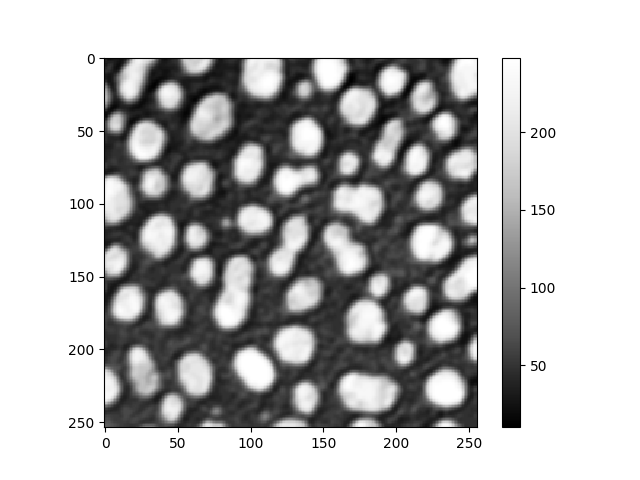
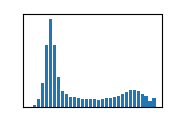

In [3]:
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
blurred

We can apply a basic thresholding using operation like `cle.greater_constant()` or its operator equivalent `>`.

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(254, 256), dtype=uint8, mtype=buffer)
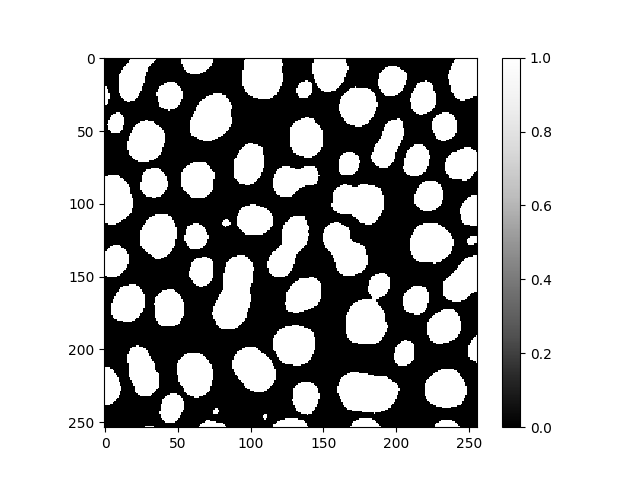
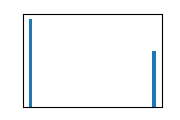

In [4]:
binary = cle.greater_constant(blurred, scalar=100)
binary

Or we can rely on an automatic thresholding algorithm such as `Otsu`

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(254, 256), dtype=uint8, mtype=buffer)
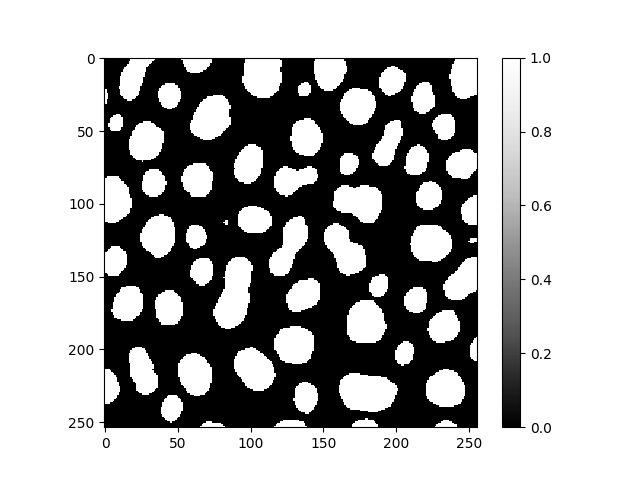
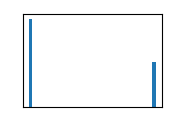

In [5]:
binary = cle.threshold_otsu(blurred)
binary

Once thresholded, we can run a labeling function to go from a semantic segmentation into a 

array([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(254, 256), dtype=uint32, mtype=buffer)
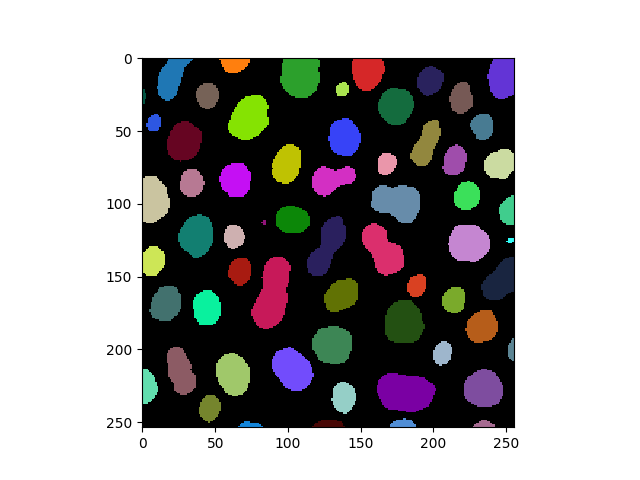

In [6]:
labeled = cle.connected_components_labeling(binary)
labeled

In [7]:
# The maximium intensity in a label image corresponds to the number of objects
num_labels = cle.maximum_of_all_pixels(labeled)
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 62.0


We can quickly count the number of object segmented by looking at the highest label value. Here, the highest label is 62, which is the number of object detected in the image.

Before rushing to the measurement of object, it is can be important to curate the segmentation to avoid possible analysis bias. For example, in case the size of the objects is relevant, one should exclude the object which were not fully imaged and thus, touch the image border. This operation will reduce the number of object detect but insure that the object we have are properly segmented.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(254, 256), dtype=uint32, mtype=buffer)
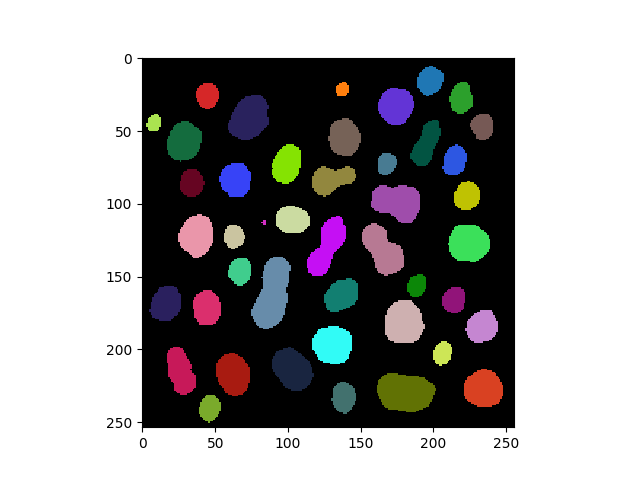

In [8]:
# Exclude Labels On Edges
labels_excl_edges = cle.exclude_labels_on_edges(labeled)
labels_excl_edges

Once satisfied with the segmentation, we can move on to quantification and analysis of the segmented objects.

## Alternative automatic thresholding

Several other algorithm for automatic thresholding based on the image histogram exist. `Yen`, `Triangle`, `IsoData`, etc. that are available in Fiji or scikit-image. 

Pyclesperanto propose the `Otsu` and `Yen` implementation. If other aproach would be usefull for you, do not hesitate to request it!